# MODELOS DE REDES PARA DENGUE LEBRIJA

### Cargue de librerias requeridas

In [1]:
import pandas as pd
import numpy as np
from numpy import concatenate
from pandas import concat
from pandas import read_csv
from pandas import DataFrame
import tensorflow as tf
from tensorflow import keras
import os
import datetime
import IPython
import IPython.display
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Flatten, LSTM, Dense, Dropout, TimeDistributed, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Input, Reshape, RepeatVector, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from scipy.stats import randint as sp_randint
np.random.seed(123) # for reproducibility
import warnings
warnings.filterwarnings('ignore')

### Cargar la base de datos

In [2]:
datos = read_csv('Lebrija_Lags.csv', encoding='latin-1', sep=";")
datos.columns

Index(['Municipio', 'Año', 'Semana_Epi', 'Casos_Dengue',
       'Temp_Seca_Max_Dia_Prom', 'Temp_Seca_Max_Dia_Prom_1',
       'Temp_Seca_Max_Dia_Prom_2', 'Temp_Seca_Max_Dia_Prom_3',
       'Temp_Seca_Max_Dia_Prom_4', 'Temp_Seca_Max_Dia_Prom_5',
       'Temp_Seca_Max_Dia_Prom_6', 'Temp_Seca_Max_Sem', 'Temp_Seca_Max_Sem_1',
       'Temp_Seca_Max_Sem_2', 'Temp_Seca_Max_Sem_3', 'Temp_Seca_Max_Sem_4',
       'Temp_Seca_Max_Sem_5', 'Temp_Seca_Max_Sem_6', 'Temp_Seca_Min_Dia_Prom',
       'Temp_Seca_Min_Dia_Prom_1', 'Temp_Seca_Min_Dia_Prom_2',
       'Temp_Seca_Min_Dia_Prom_3', 'Temp_Seca_Min_Dia_Prom_4',
       'Temp_Seca_Min_Dia_Prom_5', 'Temp_Seca_Min_Dia_Prom_6',
       'Temp_Seca_Min_Sem', 'Temp_Seca_Min_Sem_1', 'Temp_Seca_Min_Sem_2',
       'Temp_Seca_Min_Sem_3', 'Temp_Seca_Min_Sem_4', 'Temp_Seca_Min_Sem_5',
       'Temp_Seca_Min_Sem_6', 'Prom_Dia_Preci', 'Prom_Dia_Preci_1',
       'Prom_Dia_Preci_2', 'Prom_Dia_Preci_3', 'Prom_Dia_Preci_4',
       'Prom_Dia_Preci_5', 'Prom_Dia_Preci_6', '

In [3]:
# Se eliminan las columnas de las variables que No se van a utilizar
datos = datos.drop(['Municipio', 'Año', 'Semana_Epi', 'Temp_Seca_Max_Dia_Prom', 'Temp_Seca_Max_Dia_Prom_1',
                    'Temp_Seca_Max_Dia_Prom_2','Temp_Seca_Max_Dia_Prom_3','Temp_Seca_Max_Dia_Prom_4',
                    'Temp_Seca_Max_Dia_Prom_5','Temp_Seca_Max_Dia_Prom_6','Temp_Seca_Max_Sem', 'Temp_Seca_Max_Sem_1',
                    'Temp_Seca_Max_Sem_2', 'Temp_Seca_Max_Sem_3', 'Temp_Seca_Max_Sem_4','Temp_Seca_Max_Sem_5', 
                    'Temp_Seca_Max_Sem_6', 'Temp_Seca_Min_Dia_Prom','Temp_Seca_Min_Dia_Prom_1', 'Temp_Seca_Min_Dia_Prom_2',
                    'Temp_Seca_Min_Dia_Prom_5','Temp_Seca_Min_Dia_Prom_6',
                    'Temp_Seca_Min_Sem','Temp_Seca_Min_Sem_2','Temp_Seca_Min_Sem_3', 'Temp_Seca_Min_Sem_4',
                    'Temp_Seca_Min_Sem_5', 'Prom_Dia_Preci', 'Prom_Dia_Preci_1','Prom_Dia_Preci_2', 'Prom_Dia_Preci_3',
                    'Prom_Dia_Preci_4','Prom_Dia_Preci_5', 'Prom_Dia_Preci_6', 'Total_Preci_Sem','Total_Preci_Sem_1',
                    'Total_Preci_Sem_2', 'Total_Preci_Sem_3','Total_Preci_Sem_4', 'Total_Preci_Sem_5', 'Total_Preci_Sem_6',
                    'Temp_Max_Dia_Prom', 'Temp_Max_Dia_Prom_1', 'Temp_Max_Dia_Prom_2','Temp_Max_Dia_Prom_3',
                    'Temp_Max_Dia_Prom_4', 'Temp_Max_Dia_Prom_5','Temp_Max_Dia_Prom_6', 'Temp_Max_Sem', 'Temp_Max_Sem_1',
                    'Temp_Max_Sem_2', 'Temp_Max_Sem_3', 'Temp_Max_Sem_4', 'Temp_Max_Sem_5','Temp_Max_Sem_6',
                    'Temp_Min_Dia_Prom', 'Temp_Min_Dia_Prom_1','Temp_Min_Dia_Prom_2', 'Temp_Min_Dia_Prom_3',
                    'Temp_Min_Dia_Prom_4','Temp_Min_Dia_Prom_5', 'Temp_Min_Dia_Prom_6', 'Temp_Min_Sem','Temp_Min_Sem_1',
                    'Temp_Min_Sem_2','Temp_Min_Sem_5', 'Temp_Min_Sem_6','Temp_Seca_Min_Dia_Prom_3', 'Temp_Seca_Min_Dia_Prom_4',
                   'Temp_Min_Sem_3','Temp_Min_Sem_4'],axis=1)
datos.columns

Index(['Casos_Dengue', 'Temp_Seca_Min_Sem_1', 'Temp_Seca_Min_Sem_6'], dtype='object')

In [4]:
#Se verifican datos nulos o faltantes
datos.isnull().sum()

Casos_Dengue           0
Temp_Seca_Min_Sem_1    0
Temp_Seca_Min_Sem_6    0
dtype: int64

### División de los datos en set de entrenamiento y prueba

In [5]:
train_size = int(len(datos) * 0.75)
test_size = len(datos) - train_size
train, test = datos.iloc[0:train_size], datos.iloc[train_size:len(datos)]
print(len(train), len(test))

312 104


In [6]:
f_columns = ['Temp_Seca_Min_Sem_1', 'Temp_Seca_Min_Sem_6']
f_transformer = MinMaxScaler(feature_range=(0, 1))
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())

In [7]:
dengue_transformer = MinMaxScaler(feature_range=(0, 1))
dengue_transformer = dengue_transformer.fit(train[['Casos_Dengue']])
train['Casos_Dengue'] = dengue_transformer.transform(train[['Casos_Dengue']])
test['Casos_Dengue'] = dengue_transformer.transform(test[['Casos_Dengue']])

In [8]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# MODELO LSTM

In [9]:
# Creación de X_train, y_train, X_test y y_test Para el modelo LSTM

time_steps = 7

# remodelar a [muestras, pasos_de_tiempo, n_características]
X_train_LSTM, y_train_LSTM = create_dataset(train, train.Casos_Dengue, time_steps)
X_test_LSTM, y_test_LSTM = create_dataset(test, test.Casos_Dengue, time_steps)
print(X_train_LSTM.shape, y_train_LSTM.shape, X_test_LSTM.shape, y_test_LSTM.shape )

(305, 7, 3) (305,) (97, 7, 3) (97,)


### Construcción, Compilación y entrenamiento del modelo LSTM

In [10]:
Lebri_LSTM_model_1 = keras.Sequential()
    
# CAPA DE ENTRADA
Lebri_LSTM_model_1.add(keras.layers.InputLayer(input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    
    
#CAPAS INTERMEDIAS

Lebri_LSTM_model_1.add(keras.layers.LSTM(units=100,
                            activation="tanh",
                            return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))

Lebri_LSTM_model_1.add(keras.layers.LSTM(units=100,
                            activation="tanh",
                            return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))

Lebri_LSTM_model_1.add(keras.layers.LSTM(units=100,
                            activation="tanh",
                            #return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))
        
#CAPA DE SALIDA
Lebri_LSTM_model_1.add(keras.layers.Dense(1, activation="linear"))
    

#COMPILACIÓN DEL MODELO
Lebri_LSTM_model_1.compile(optimizer="adam", loss = 'mse', metrics = ['mse'])


#Se utiliza la devolución de llamada ModelCheckpoint para guardar puntos de control con regularidad 
#y la EarlyStopping para interrumpir el entrenamiento cuando la pérdida de validación ya no mejore.
model_filepath = 'Lebri_LSTM_model_2.h5'
checkpoint_LSTM = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=0, save_best_only = True, mode='min')
monitor_LSTM = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto')


#ENTRENAMIENTO DEL MODELO
history_LSTM = Lebri_LSTM_model_1.fit(X_train_LSTM,y_train_LSTM, validation_data=(X_test_LSTM,y_test_LSTM), 
                                     verbose=2, epochs=100, callbacks=[monitor_LSTM, checkpoint_LSTM])
Lebri_LSTM_model_1.load_weights(model_filepath)

Epoch 1/100
10/10 - 8s - loss: 0.0872 - mse: 0.0872 - val_loss: 0.8706 - val_mse: 0.8706 - 8s/epoch - 779ms/step
Epoch 2/100
10/10 - 0s - loss: 0.0651 - mse: 0.0651 - val_loss: 1.2235 - val_mse: 1.2235 - 234ms/epoch - 23ms/step
Epoch 3/100
10/10 - 0s - loss: 0.0624 - mse: 0.0624 - val_loss: 0.9122 - val_mse: 0.9122 - 250ms/epoch - 25ms/step
Epoch 4/100
10/10 - 0s - loss: 0.0591 - mse: 0.0591 - val_loss: 0.9464 - val_mse: 0.9464 - 250ms/epoch - 25ms/step
Epoch 5/100
10/10 - 0s - loss: 0.0525 - mse: 0.0525 - val_loss: 0.6777 - val_mse: 0.6777 - 297ms/epoch - 30ms/step
Epoch 6/100
10/10 - 0s - loss: 0.0515 - mse: 0.0515 - val_loss: 0.5829 - val_mse: 0.5829 - 282ms/epoch - 28ms/step
Epoch 7/100
10/10 - 0s - loss: 0.0531 - mse: 0.0531 - val_loss: 0.6390 - val_mse: 0.6390 - 281ms/epoch - 28ms/step
Epoch 8/100
10/10 - 0s - loss: 0.0527 - mse: 0.0527 - val_loss: 0.5951 - val_mse: 0.5951 - 253ms/epoch - 25ms/step
Epoch 9/100
10/10 - 0s - loss: 0.0515 - mse: 0.0515 - val_loss: 0.6695 - val_mse: 

# MODELO CNN

In [11]:
# Creación de X_train, y_train, X_test y y_test Para el modelo CNN

time_steps = 7

# remodelar a [muestras, pasos_de_tiempo, n_características]
X_train_CNN, y_train_CNN = create_dataset(train, train.Casos_Dengue, time_steps)
X_test_CNN, y_test_CNN = create_dataset(test, test.Casos_Dengue, time_steps)
print(X_train_CNN.shape, y_train_CNN.shape, X_test_CNN.shape, y_test_CNN.shape )

(305, 7, 3) (305,) (97, 7, 3) (97,)


### Construcción, Compilación y entrenamiento del modelo CNN

In [12]:
Lebri_CNN_model_1 = keras.Sequential()
    
# CAPA DE ENTRADA
Lebri_CNN_model_1.add(keras.layers.InputLayer(input_shape=(X_train_CNN.shape[1], X_train_CNN.shape[2])))
    
    
#CAPAS INTERMEDIAS

Lebri_CNN_model_1.add(keras.layers.Conv1D(80, kernel_size=2, strides=1, activation='linear', padding='same'))
Lebri_CNN_model_1.add(keras.layers.MaxPooling1D(pool_size=2, padding='same'))

Lebri_CNN_model_1.add(keras.layers.Conv1D(80, kernel_size=2, strides=1, activation='linear', padding='same'))
Lebri_CNN_model_1.add(keras.layers.MaxPooling1D(pool_size=2, padding='same'))

Lebri_CNN_model_1.add(keras.layers.Conv1D(80, kernel_size=2, strides=1, activation='linear', padding='same'))
Lebri_CNN_model_1.add(keras.layers.MaxPooling1D(pool_size=2, padding='same'))

Lebri_CNN_model_1.add(Dropout(0.5))
Lebri_CNN_model_1.add(Flatten())
    
Lebri_CNN_model_1.add(keras.layers.Dense(units=256, activation='linear'))
Lebri_CNN_model_1.add(Dropout(0.5)) 


#CAPA DE SALIDA                 
Lebri_CNN_model_1.add(Dense(1))


#COMPILACIÓN DEL MODELO
Lebri_CNN_model_1.compile(optimizer='rmsprop', loss = 'mse', metrics = ['mse'])


#Se utiliza la devolución de llamada ModelCheckpoint para guardar puntos de control con regularidad 
#y la EarlyStopping para interrumpir el entrenamiento cuando la pérdida de validación ya no mejore.
model_filepath = 'Lebri_CNN_model_2.h5'
checkpoint_CNN = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=0, save_best_only = True, mode='min')
monitor_CNN = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto')


#ENTRENAMIENTO DEL MODELO
history_CNN = Lebri_CNN_model_1.fit(X_train_CNN,y_train_CNN, validation_data=(X_test_CNN,y_test_CNN), 
                                     verbose=2, epochs=100, callbacks=[monitor_CNN, checkpoint_CNN])
Lebri_CNN_model_1.load_weights(model_filepath)

Epoch 1/100
10/10 - 2s - loss: 0.1179 - mse: 0.1179 - val_loss: 0.4731 - val_mse: 0.4731 - 2s/epoch - 191ms/step
Epoch 2/100
10/10 - 0s - loss: 0.0545 - mse: 0.0545 - val_loss: 0.4225 - val_mse: 0.4225 - 131ms/epoch - 13ms/step
Epoch 3/100
10/10 - 0s - loss: 0.0596 - mse: 0.0596 - val_loss: 0.3776 - val_mse: 0.3776 - 136ms/epoch - 14ms/step
Epoch 4/100
10/10 - 0s - loss: 0.0552 - mse: 0.0552 - val_loss: 0.3544 - val_mse: 0.3544 - 134ms/epoch - 13ms/step
Epoch 5/100
10/10 - 0s - loss: 0.0537 - mse: 0.0537 - val_loss: 0.4617 - val_mse: 0.4617 - 80ms/epoch - 8ms/step
Epoch 6/100
10/10 - 0s - loss: 0.0552 - mse: 0.0552 - val_loss: 0.4262 - val_mse: 0.4262 - 107ms/epoch - 11ms/step
Epoch 7/100
10/10 - 0s - loss: 0.0482 - mse: 0.0482 - val_loss: 0.4383 - val_mse: 0.4383 - 115ms/epoch - 11ms/step
Epoch 8/100
10/10 - 0s - loss: 0.0643 - mse: 0.0643 - val_loss: 0.4838 - val_mse: 0.4838 - 143ms/epoch - 14ms/step
Epoch 9/100
10/10 - 0s - loss: 0.0538 - mse: 0.0538 - val_loss: 0.4265 - val_mse: 0.

# MODELO RNN

In [13]:
# Creación de X_train, y_train, X_test y y_test Para el modelo RNN

time_steps = 7

# remodelar a [muestras, pasos_de_tiempo, n_características]
X_train_RNN, y_train_RNN = create_dataset(train, train.Casos_Dengue, time_steps)
X_test_RNN, y_test_RNN = create_dataset(test, test.Casos_Dengue, time_steps)
print(X_train_RNN.shape, y_train_RNN.shape, X_test_RNN.shape, y_test_RNN.shape )

(305, 7, 3) (305,) (97, 7, 3) (97,)


### Construcción, Compilación y entrenamiento del modelo RNN

In [14]:
Lebri_RNN_model_1 = keras.Sequential()
    
# CAPA DE ENTRADA
Lebri_RNN_model_1.add(keras.layers.InputLayer(input_shape=(X_train_RNN.shape[1], X_train_RNN.shape[2])))
    
    
#CAPAS INTERMEDIAS

Lebri_RNN_model_1.add(keras.layers.SimpleRNN(units=100,
                            activation="tanh",
                            return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))

Lebri_RNN_model_1.add(keras.layers.SimpleRNN(units=100,
                            activation="tanh",
                            return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))

Lebri_RNN_model_1.add(keras.layers.SimpleRNN(units=100,
                            activation="tanh",
                            #return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))
        
#CAPA DE SALIDA
Lebri_RNN_model_1.add(keras.layers.Dense(1, activation="linear"))
    

#COMPILACIÓN DEL MODELO
Lebri_RNN_model_1.compile(optimizer="adam", loss = 'mse', metrics = ['mse'])


#Se utiliza la devolución de llamada ModelCheckpoint para guardar puntos de control con regularidad 
#y la EarlyStopping para interrumpir el entrenamiento cuando la pérdida de validación ya no mejore.
model_filepath = 'Lebri_RNN_model_2.h5'
checkpoint_RNN = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=0, save_best_only = True, mode='min')
monitor_RNN = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto')


#ENTRENAMIENTO DEL MODELO
history_RNN = Lebri_RNN_model_1.fit(X_train_RNN,y_train_RNN, validation_data=(X_test_RNN,y_test_RNN), 
                                     verbose=2, epochs=100, callbacks=[monitor_RNN, checkpoint_RNN])
Lebri_RNN_model_1.load_weights(model_filepath)

Epoch 1/100
10/10 - 4s - loss: 0.0894 - mse: 0.0894 - val_loss: 0.7749 - val_mse: 0.7749 - 4s/epoch - 445ms/step
Epoch 2/100
10/10 - 0s - loss: 0.0590 - mse: 0.0590 - val_loss: 0.6836 - val_mse: 0.6836 - 216ms/epoch - 22ms/step
Epoch 3/100
10/10 - 0s - loss: 0.0564 - mse: 0.0564 - val_loss: 0.5881 - val_mse: 0.5881 - 202ms/epoch - 20ms/step
Epoch 4/100
10/10 - 0s - loss: 0.0572 - mse: 0.0572 - val_loss: 0.8413 - val_mse: 0.8413 - 155ms/epoch - 15ms/step
Epoch 5/100
10/10 - 0s - loss: 0.0548 - mse: 0.0548 - val_loss: 0.5342 - val_mse: 0.5342 - 242ms/epoch - 24ms/step
Epoch 6/100
10/10 - 0s - loss: 0.0560 - mse: 0.0560 - val_loss: 0.6025 - val_mse: 0.6025 - 151ms/epoch - 15ms/step
Epoch 7/100
10/10 - 0s - loss: 0.0546 - mse: 0.0546 - val_loss: 0.6743 - val_mse: 0.6743 - 149ms/epoch - 15ms/step
Epoch 8/100
10/10 - 0s - loss: 0.0530 - mse: 0.0530 - val_loss: 0.5084 - val_mse: 0.5084 - 211ms/epoch - 21ms/step
Epoch 9/100
10/10 - 0s - loss: 0.0564 - mse: 0.0564 - val_loss: 0.6253 - val_mse: 

# MODELO GRU

In [15]:
# Creación de X_train, y_train, X_test y y_test Para el modelo GRU

time_steps = 7

# remodelar a [muestras, pasos_de_tiempo, n_características]
X_train_GRU, y_train_GRU = create_dataset(train, train.Casos_Dengue, time_steps)
X_test_GRU, y_test_GRU = create_dataset(test, test.Casos_Dengue, time_steps)
print(X_train_GRU.shape, y_train_GRU.shape, X_test_GRU.shape, y_test_GRU.shape )

(305, 7, 3) (305,) (97, 7, 3) (97,)


### Construcción, Compilación y entrenamiento del modelo GRU

In [16]:
Lebri_GRU_model_1 = keras.Sequential()
    
# CAPA DE ENTRADA
Lebri_GRU_model_1.add(keras.layers.InputLayer(input_shape=(X_train_GRU.shape[1], X_train_GRU.shape[2])))
    
    
#CAPAS INTERMEDIAS

Lebri_GRU_model_1.add(keras.layers.GRU(units=100,
                            activation="tanh",
                            return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))

Lebri_GRU_model_1.add(keras.layers.GRU(units=100,
                            activation="tanh",
                            return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))

Lebri_GRU_model_1.add(keras.layers.GRU(units=100,
                            activation="tanh",
                            #return_sequences = True,
                            dropout= 0.5,
                            kernel_initializer="uniform"))
        
#CAPA DE SALIDA
Lebri_GRU_model_1.add(keras.layers.Dense(1, activation="linear"))
    

#COMPILACIÓN DEL MODELO
Lebri_GRU_model_1.compile(optimizer="adam", loss = 'mse', metrics = ['mse'])


#Se utiliza la devolución de llamada ModelCheckpoint para guardar puntos de control con regularidad 
#y la EarlyStopping para interrumpir el entrenamiento cuando la pérdida de validación ya no mejore.
model_filepath = 'Lebri_GRU_model_2.h5'
checkpoint_GRU = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=0, save_best_only = True, mode='min')
monitor_GRU = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto')


#ENTRENAMIENTO DEL MODELO
history_GRU = Lebri_GRU_model_1.fit(X_train_GRU,y_train_GRU, validation_data=(X_test_GRU,y_test_GRU), 
                                     verbose=2, epochs=100, callbacks=[monitor_GRU, checkpoint_GRU])
Lebri_GRU_model_1.load_weights(model_filepath)

Epoch 1/100
10/10 - 11s - loss: 0.0854 - mse: 0.0854 - val_loss: 1.1163 - val_mse: 1.1163 - 11s/epoch - 1s/step
Epoch 2/100
10/10 - 0s - loss: 0.0647 - mse: 0.0647 - val_loss: 1.0921 - val_mse: 1.0921 - 343ms/epoch - 34ms/step
Epoch 3/100
10/10 - 0s - loss: 0.0578 - mse: 0.0578 - val_loss: 0.8833 - val_mse: 0.8833 - 359ms/epoch - 36ms/step
Epoch 4/100
10/10 - 0s - loss: 0.0539 - mse: 0.0539 - val_loss: 0.7865 - val_mse: 0.7865 - 344ms/epoch - 34ms/step
Epoch 5/100
10/10 - 0s - loss: 0.0525 - mse: 0.0525 - val_loss: 0.5570 - val_mse: 0.5570 - 415ms/epoch - 41ms/step
Epoch 6/100
10/10 - 0s - loss: 0.0523 - mse: 0.0523 - val_loss: 0.4690 - val_mse: 0.4690 - 424ms/epoch - 42ms/step
Epoch 7/100
10/10 - 0s - loss: 0.0549 - mse: 0.0549 - val_loss: 0.7960 - val_mse: 0.7960 - 371ms/epoch - 37ms/step
Epoch 8/100
10/10 - 0s - loss: 0.0519 - mse: 0.0519 - val_loss: 0.6078 - val_mse: 0.6078 - 335ms/epoch - 34ms/step
Epoch 9/100
10/10 - 0s - loss: 0.0448 - mse: 0.0448 - val_loss: 0.4606 - val_mse: 0

### Graficas de función de pérdida & RMSE

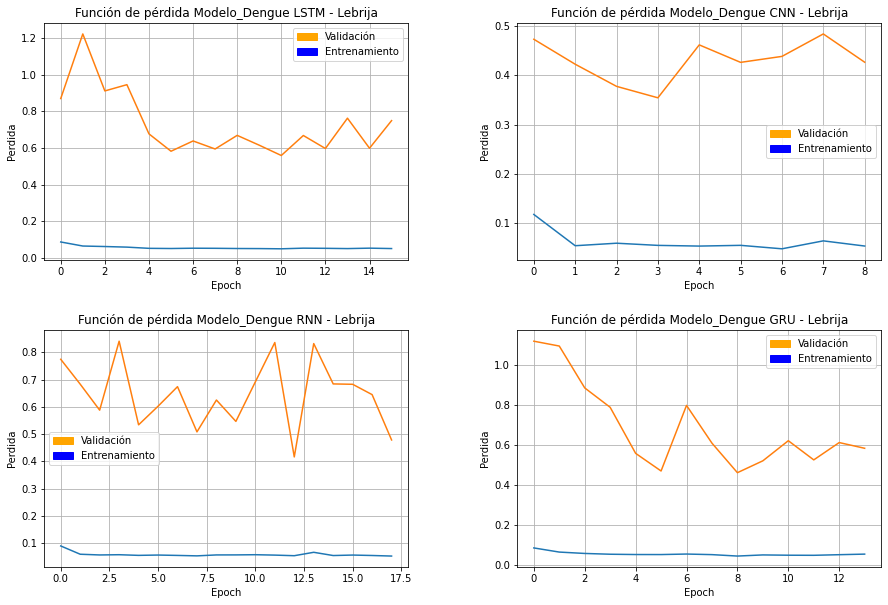

In [17]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.subplot(2, 2, 1)
orange_patch = mpatches.Patch(color='orange', label='Validación')
blue_patch = mpatches.Patch(color='blue', label='Entrenamiento')
plt.legend(handles=[orange_patch, blue_patch])
plt.title('Función de pérdida Modelo_Dengue LSTM - Lebrija')
plt.xlabel("Epoch")
plt.ylabel("Perdida")
plt.grid(True)
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])

plt.subplot(2, 2, 2)
orange_patch = mpatches.Patch(color='orange', label='Validación')
blue_patch = mpatches.Patch(color='blue', label='Entrenamiento')
plt.legend(handles=[orange_patch, blue_patch])
plt.title('Función de pérdida Modelo_Dengue CNN - Lebrija')
plt.xlabel("Epoch")
plt.ylabel("Perdida")
plt.grid(True)
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])

plt.subplot(2, 2, 3)
orange_patch = mpatches.Patch(color='orange', label='Validación')
blue_patch = mpatches.Patch(color='blue', label='Entrenamiento')
plt.legend(handles=[orange_patch, blue_patch])
plt.title('Función de pérdida Modelo_Dengue RNN - Lebrija')
plt.xlabel("Epoch")
plt.ylabel("Perdida")
plt.grid(True)
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])

plt.subplot(2, 2, 4)
orange_patch = mpatches.Patch(color='orange', label='Validación')
blue_patch = mpatches.Patch(color='blue', label='Entrenamiento')
plt.legend(handles=[orange_patch, blue_patch])
plt.title('Función de pérdida Modelo_Dengue GRU - Lebrija')
plt.xlabel("Epoch")
plt.ylabel("Perdida")
plt.grid(True)
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])

plt.show()

# Gráficas de dispersión

4/4 [==============================] - 2s 13ms/step


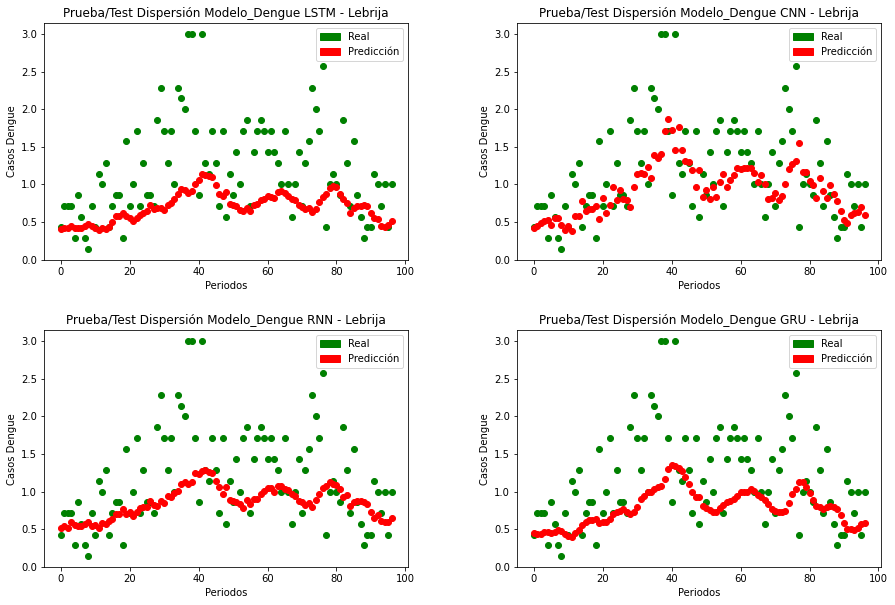

In [18]:
results_LSTM =Lebri_LSTM_model_1.predict(X_test_LSTM)
results_CNN =Lebri_CNN_model_1.predict(X_test_CNN)
results_RNN =Lebri_RNN_model_1.predict(X_test_RNN)
results_GRU =Lebri_GRU_model_1.predict(X_test_GRU)

plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.subplot(2, 2, 1)
green_patch = mpatches.Patch(color='green', label='Real')
red_patch = mpatches.Patch(color='red', label='Predicción')
plt.legend(handles=[green_patch, red_patch])
plt.title('Prueba/Test Dispersión Modelo_Dengue LSTM - Lebrija')
plt.xlabel("Periodos")
plt.ylabel("Casos Dengue")
plt.scatter(range(len(y_test_LSTM)),y_test_LSTM,c='g')
plt.scatter(range(len(results_LSTM)),results_LSTM,c='r')

plt.subplot(2, 2, 2)
green_patch = mpatches.Patch(color='green', label='Real')
red_patch = mpatches.Patch(color='red', label='Predicción')
plt.legend(handles=[green_patch, red_patch])
plt.title('Prueba/Test Dispersión Modelo_Dengue CNN - Lebrija')
plt.xlabel("Periodos")
plt.ylabel("Casos Dengue")
plt.scatter(range(len(y_test_CNN)),y_test_CNN,c='g')
plt.scatter(range(len(results_CNN)),results_CNN,c='r')

plt.subplot(2, 2, 3)
green_patch = mpatches.Patch(color='green', label='Real')
red_patch = mpatches.Patch(color='red', label='Predicción')
plt.legend(handles=[green_patch, red_patch])
plt.title('Prueba/Test Dispersión Modelo_Dengue RNN - Lebrija')
plt.xlabel("Periodos")
plt.ylabel("Casos Dengue")
plt.scatter(range(len(y_test_RNN)),y_test_RNN,c='g')
plt.scatter(range(len(results_RNN)),results_RNN,c='r')

plt.subplot(2, 2, 4)
green_patch = mpatches.Patch(color='green', label='Real')
red_patch = mpatches.Patch(color='red', label='Predicción')
plt.legend(handles=[green_patch, red_patch])
plt.title('Prueba/Test Dispersión Modelo_Dengue GRU - Lebrija')
plt.xlabel("Periodos")
plt.ylabel("Casos Dengue")
plt.scatter(range(len(y_test_GRU)),y_test_GRU,c='g')
plt.scatter(range(len(results_GRU)),results_GRU,c='r')

plt.show()

In [19]:
y_pred_LSTM = Lebri_LSTM_model_1.predict(X_test_LSTM)
y_pred_CNN = Lebri_CNN_model_1.predict(X_test_CNN)
y_pred_RNN = Lebri_RNN_model_1.predict(X_test_RNN)
y_pred_GRU = Lebri_GRU_model_1.predict(X_test_GRU)

y_train_inv_LSTM = dengue_transformer.inverse_transform(y_train_LSTM.reshape(1, -1))
y_train_inv_CNN = dengue_transformer.inverse_transform(y_train_CNN.reshape(1, -1))
y_train_inv_RNN = dengue_transformer.inverse_transform(y_train_RNN.reshape(1, -1))
y_train_inv_GRU = dengue_transformer.inverse_transform(y_train_GRU.reshape(1, -1))

y_test_inv_LSTM = dengue_transformer.inverse_transform(y_test_LSTM.reshape(1, -1))
y_test_inv_CNN = dengue_transformer.inverse_transform(y_test_CNN.reshape(1, -1))
y_test_inv_RNN = dengue_transformer.inverse_transform(y_test_RNN.reshape(1, -1))
y_test_inv_GRU = dengue_transformer.inverse_transform(y_test_GRU.reshape(1, -1))

y_pred_inv_LSTM = dengue_transformer.inverse_transform(y_pred_LSTM)
y_pred_inv_CNN = dengue_transformer.inverse_transform(y_pred_CNN)
y_pred_inv_RNN = dengue_transformer.inverse_transform(y_pred_RNN)
y_pred_inv_GRU = dengue_transformer.inverse_transform(y_pred_GRU)

4/4 [==============================] - 0s 11ms/step


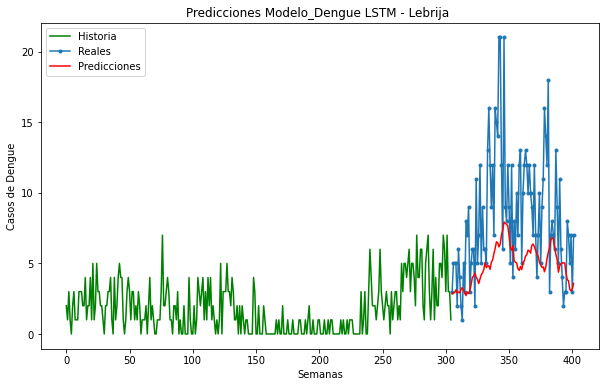

In [20]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, len(y_train_LSTM)), y_train_inv_LSTM.flatten(), 'g', label="Historia")
plt.plot(np.arange(len(y_train_LSTM), len(y_train_LSTM) + len(y_test_LSTM)), y_test_inv_LSTM.flatten(), marker='.', label="Reales")
plt.plot(np.arange(len(y_train_LSTM), len(y_train_LSTM) + len(y_test_LSTM)), y_pred_inv_LSTM.flatten(), 'r', label="Predicciones")
plt.title('Predicciones Modelo_Dengue LSTM - Lebrija ')
plt.ylabel('Casos de Dengue')
plt.xlabel('Semanas')
plt.legend()
plt.show();

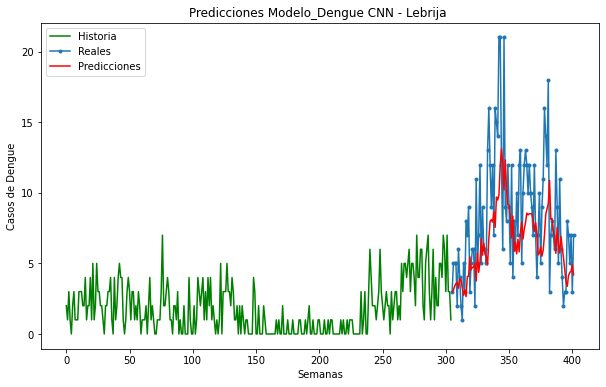

In [21]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, len(y_train_CNN)), y_train_inv_CNN.flatten(), 'g', label="Historia")
plt.plot(np.arange(len(y_train_CNN), len(y_train_CNN) + len(y_test_CNN)), y_test_inv_CNN.flatten(), marker='.', label="Reales")
plt.plot(np.arange(len(y_train_CNN), len(y_train_CNN) + len(y_test_CNN)), y_pred_inv_CNN.flatten(), 'r', label="Predicciones")
plt.title('Predicciones Modelo_Dengue CNN - Lebrija ')
plt.ylabel('Casos de Dengue')
plt.xlabel('Semanas')
plt.legend()
plt.show();

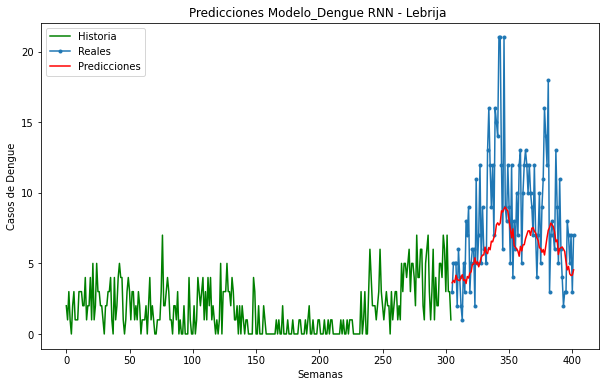

In [22]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, len(y_train_RNN)), y_train_inv_RNN.flatten(), 'g', label="Historia")
plt.plot(np.arange(len(y_train_RNN), len(y_train_RNN) + len(y_test_RNN)), y_test_inv_RNN.flatten(), marker='.', label="Reales")
plt.plot(np.arange(len(y_train_RNN), len(y_train_RNN) + len(y_test_RNN)), y_pred_inv_RNN.flatten(), 'r', label="Predicciones")
plt.title('Predicciones Modelo_Dengue RNN - Lebrija ')
plt.ylabel('Casos de Dengue')
plt.xlabel('Semanas')
plt.legend()
plt.show();

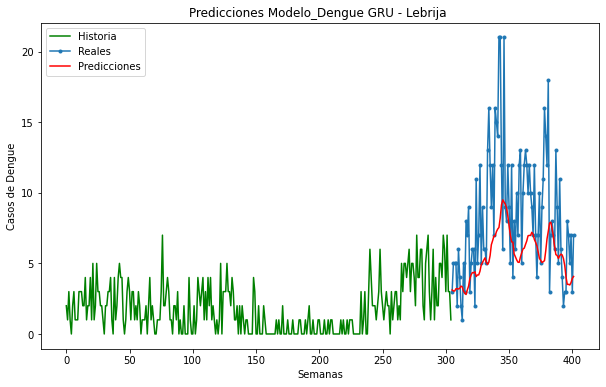

In [23]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, len(y_train_GRU)), y_train_inv_GRU.flatten(), 'g', label="Historia")
plt.plot(np.arange(len(y_train_GRU), len(y_train_GRU) + len(y_test_GRU)), y_test_inv_GRU.flatten(), marker='.', label="Reales")
plt.plot(np.arange(len(y_train_GRU), len(y_train_GRU) + len(y_test_GRU)), y_pred_inv_GRU.flatten(), 'r', label="Predicciones")
plt.title('Predicciones Modelo_Dengue GRU - Lebrija ')
plt.ylabel('Casos de Dengue')
plt.xlabel('Semanas')
plt.legend()
plt.show();

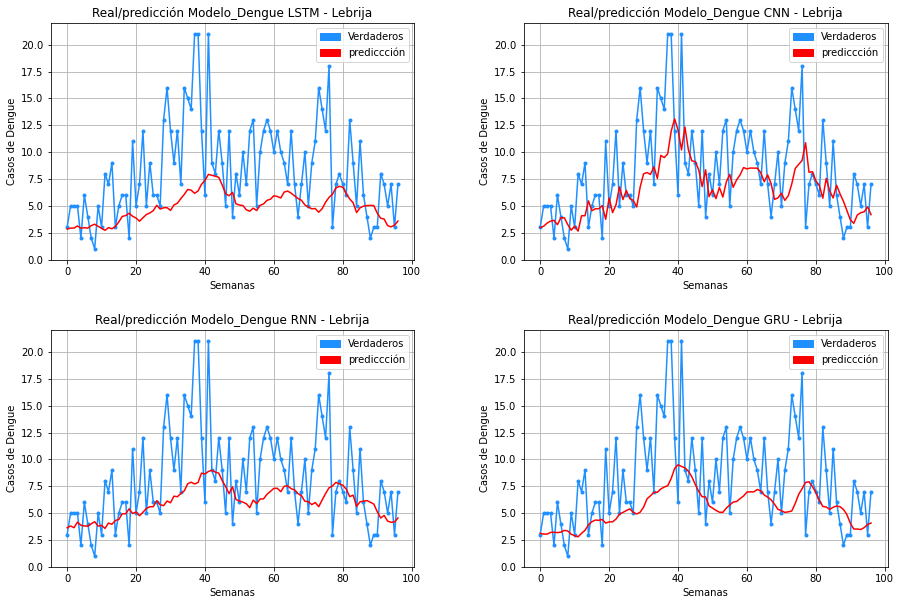

In [24]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.subplot(2, 2, 1)
plt.title('Real/predicción Modelo_Dengue LSTM - Lebrija' )
green_patch = mpatches.Patch(color='dodgerblue', label="Verdaderos")
red_patch = mpatches.Patch(color='red', label="prediccción")
plt.legend(handles=[green_patch, red_patch])
plt.plot(y_test_inv_LSTM.flatten(), marker='.', color= 'dodgerblue', label="Verdaderos")
plt.plot(y_pred_inv_LSTM.flatten(), color= 'red', label="prediccción")
plt.xlabel("Semanas")
plt.ylabel("Casos de Dengue")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.title('Real/predicción Modelo_Dengue CNN - Lebrija' )
green_patch = mpatches.Patch(color='dodgerblue', label="Verdaderos")
red_patch = mpatches.Patch(color='red', label="prediccción")
plt.legend(handles=[green_patch, red_patch])
plt.plot(y_test_inv_CNN.flatten(), marker='.', color= 'dodgerblue', label="Verdaderos")
plt.plot(y_pred_inv_CNN.flatten(), color= 'red', label="prediccción")
plt.xlabel("Semanas")
plt.ylabel("Casos de Dengue")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.title('Real/predicción Modelo_Dengue RNN - Lebrija' )
green_patch = mpatches.Patch(color='dodgerblue', label="Verdaderos")
red_patch = mpatches.Patch(color='red', label="prediccción")
plt.legend(handles=[green_patch, red_patch])
plt.plot(y_test_inv_RNN.flatten(), marker='.', color= 'dodgerblue', label="Verdaderos")
plt.plot(y_pred_inv_RNN.flatten(), color= 'red', label="prediccción")
plt.xlabel("Semanas")
plt.ylabel("Casos de Dengue")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.title('Real/predicción Modelo_Dengue GRU - Lebrija' )
green_patch = mpatches.Patch(color='dodgerblue', label="Verdaderos")
red_patch = mpatches.Patch(color='red', label="prediccción")
plt.legend(handles=[green_patch, red_patch])
plt.plot(y_test_inv_GRU.flatten(), marker='.', color= 'dodgerblue', label="Verdaderos")
plt.plot(y_pred_inv_GRU.flatten(), color= 'red', label="prediccción")
plt.xlabel("Semanas")
plt.ylabel("Casos de Dengue")
plt.grid(True)

plt.show()

In [25]:
score_LSTM = np.sqrt(metrics.mean_squared_error(y_test_inv_LSTM.flatten(), y_pred_inv_LSTM.flatten()))
score_CNN = np.sqrt(metrics.mean_squared_error(y_test_inv_CNN.flatten(), y_pred_inv_CNN.flatten()))
score_RNN = np.sqrt(metrics.mean_squared_error(y_test_inv_RNN.flatten(), y_pred_inv_RNN.flatten()))
score_GRU = np.sqrt(metrics.mean_squared_error(y_test_inv_GRU.flatten(), y_pred_inv_GRU.flatten()))

print("RMSE Modelo LSTM Dengue Lebrija : {}".format(score_LSTM))
print("RMSE Modelo CNN Dengue Lebrija  : {}".format(score_CNN))
print("RMSE Modelo RNN Dengue Lebrija  : {}".format(score_RNN))
print("RMSE Modelo GRU Dengue Lebrija  : {}".format(score_GRU))

RMSE Modelo LSTM Dengue Lebrija : 5.23630964136447
RMSE Modelo CNN Dengue Lebrija  : 4.1670967187366
RMSE Modelo RNN Dengue Lebrija  : 4.5166573211203715
RMSE Modelo GRU Dengue Lebrija  : 4.750495432331501


In [26]:
print("MSE Modelo LSTM Dengue Lebrija  = ", mean_squared_error(y_test_inv_LSTM.flatten(), y_pred_inv_LSTM.flatten()))
print("MSE Modelo CNN Dengue Lebrija   = ", mean_squared_error(y_test_inv_CNN.flatten(), y_pred_inv_CNN.flatten()))
print("MSE Modelo RNN Dengue Lebrija   = ", mean_squared_error(y_test_inv_RNN.flatten(), y_pred_inv_RNN.flatten()))
print("MSE Modelo GRU Dengue Lebrija  = ", mean_squared_error(y_test_inv_GRU.flatten(), y_pred_inv_GRU.flatten()))

MSE Modelo LSTM Dengue Lebrija  =  27.418938660246507
MSE Modelo CNN Dengue Lebrija   =  17.364695063305337
MSE Modelo RNN Dengue Lebrija   =  20.40019335643025
MSE Modelo GRU Dengue Lebrija  =  22.567206852602457


In [27]:
print("MAE Modelo LSTM Dengue Lebrija = ", mean_absolute_error(y_test_inv_LSTM.flatten(), y_pred_inv_LSTM.flatten()))
print("MAE Modelo CNN Dengue Lebrija = ", mean_absolute_error(y_test_inv_CNN.flatten(), y_pred_inv_CNN.flatten()))
print("MAE Modelo RNN Dengue Lebrija = ", mean_absolute_error(y_test_inv_RNN.flatten(), y_pred_inv_RNN.flatten()))
print("MAE Modelo GRU Dengue Lebrija = ", mean_absolute_error(y_test_inv_GRU.flatten(), y_pred_inv_GRU.flatten()))

MAE Modelo LSTM Dengue Lebrija =  3.945760245175706
MAE Modelo CNN Dengue Lebrija =  3.24252236012331
MAE Modelo RNN Dengue Lebrija =  3.357515588249128
MAE Modelo GRU Dengue Lebrija =  3.568054690803449


In [28]:
print("r2_score Modelo LSTM Dengue Lebrija  = ", r2_score(y_test_inv_LSTM.flatten(), y_pred_inv_LSTM.flatten()))
print("r2_score Modelo CNN Dengue Lebrija  = ", r2_score(y_test_inv_CNN.flatten(), y_pred_inv_CNN.flatten()))
print("r2_score Modelo RNN Dengue Lebrija  = ", r2_score(y_test_inv_RNN.flatten(), y_pred_inv_RNN.flatten()))
print("r2_score Modelo GRU Dengue Lebrija  = ", r2_score(y_test_inv_GRU.flatten(), y_pred_inv_GRU.flatten()))

r2_score Modelo LSTM Dengue Lebrija  =  -0.43714511483499385
r2_score Modelo CNN Dengue Lebrija  =  0.08984125935514098
r2_score Modelo RNN Dengue Lebrija  =  -0.06926232948578503
r2_score Modelo GRU Dengue Lebrija  =  -0.1828448754185601


In [29]:
print("explained_variance_score Modelo LSTM Dengue Lebrija  = ", explained_variance_score(y_test_inv_LSTM.flatten(), 
                                                                                           y_pred_inv_LSTM.flatten()))
print("explained_variance_score Modelo CNN Dengue Lebrija  = ", explained_variance_score(y_test_inv_CNN.flatten(), 
                                                                                           y_pred_inv_CNN.flatten()))
print("explained_variance_score Modelo RNN Dengue Lebrija = ", explained_variance_score(y_test_inv_RNN.flatten(), 
                                                                                           y_pred_inv_RNN.flatten()))
print("explained_variance_score Modelo GRU Dengue Lebrija  = ", explained_variance_score(y_test_inv_GRU.flatten(), 
                                                                                           y_test_inv_GRU.flatten()))

explained_variance_score Modelo LSTM Dengue Lebrija  =  0.18707631765050314
explained_variance_score Modelo CNN Dengue Lebrija  =  0.2634560350555253
explained_variance_score Modelo RNN Dengue Lebrija =  0.21493315496793286
explained_variance_score Modelo GRU Dengue Lebrija  =  1.0


### VISUALIZACIÓN DE LOS VALORES TESTEADOS VS LAS PREDICCIONES

In [30]:
#MODELO LSTM
resultados_LSTM = pd.DataFrame({ 'Actuales':y_test_inv_LSTM.flatten(), 'Predicciones': y_pred_inv_LSTM.flatten()})
resultados_LSTM['diferencia'] = resultados_LSTM['Predicciones'] - resultados_LSTM['Actuales']
print(resultados_LSTM.head(5))
print(resultados_LSTM.tail(5))

   Actuales  Predicciones  diferencia
0       3.0      2.841778   -0.158222
1       5.0      2.925134   -2.074866
2       5.0      2.929014   -2.070986
3       5.0      3.126481   -1.873519
4       2.0      2.919491    0.919491
    Actuales  Predicciones  diferencia
92       7.0      3.766874   -3.233126
93       5.0      3.157881   -1.842119
94       7.0      3.043555   -3.956445
95       3.0      3.198399    0.198399
96       7.0      3.580599   -3.419401


In [31]:
#MODELO CNN
resultados_CNN = pd.DataFrame({ 'Actuales':y_test_inv_CNN.flatten(), 'Predicciones': y_pred_inv_CNN.flatten()})
resultados_CNN['diferencia'] = resultados_CNN['Predicciones'] - resultados_CNN['Actuales']
print(resultados_CNN.head(5))
print(resultados_CNN.tail(5))

   Actuales  Predicciones  diferencia
0       3.0      2.975836   -0.024164
1       5.0      3.099457   -1.900543
2       5.0      3.393947   -1.606053
3       5.0      3.572069   -1.427931
4       2.0      3.651695    1.651695
    Actuales  Predicciones  diferencia
92       7.0      4.139913   -2.860087
93       5.0      4.357831   -0.642169
94       7.0      4.439827   -2.560173
95       3.0      4.910949    1.910949
96       7.0      4.178864   -2.821136


In [32]:
#MODELO RNN
resultados_RNN = pd.DataFrame({ 'Actuales':y_test_inv_RNN.flatten(), 'Predicciones': y_pred_inv_RNN.flatten()})
resultados_RNN['diferencia'] = resultados_RNN['Predicciones'] - resultados_RNN['Actuales']
print(resultados_RNN.head(5))
print(resultados_RNN.tail(5))

   Actuales  Predicciones  diferencia
0       3.0      3.629019    0.629019
1       5.0      3.799935   -1.200065
2       5.0      3.640347   -1.359653
3       5.0      4.158218   -0.841782
4       2.0      3.862843    1.862843
    Actuales  Predicciones  diferencia
92       7.0      4.782529   -2.217471
93       5.0      4.253852   -0.746148
94       7.0      4.140296   -2.859704
95       3.0      4.171863    1.171863
96       7.0      4.542225   -2.457775


In [33]:
#MODELO GRU
resultados_GRU = pd.DataFrame({ 'Actuales':y_test_inv_GRU.flatten(), 'Predicciones': y_pred_inv_GRU.flatten()})
resultados_GRU['diferencia'] = resultados_GRU['Predicciones'] - resultados_GRU['Actuales']
print(resultados_GRU.head(5))
print(resultados_GRU.tail(5))

   Actuales  Predicciones  diferencia
0       3.0      3.117757    0.117757
1       5.0      3.045612   -1.954388
2       5.0      3.040781   -1.959219
3       5.0      3.201329   -1.798671
4       2.0      3.215919    1.215919
    Actuales  Predicciones  diferencia
92       7.0      3.514446   -3.485554
93       5.0      3.469719   -1.530281
94       7.0      3.642726   -3.357274
95       3.0      3.939623    0.939623
96       7.0      4.074891   -2.925109
